In [2]:
import pandas
import seaborn

pandas.options.display.max_columns = 11
pandas.options.display.max_rows = 30

game_sales_data = pandas.read_csv("vgsales.csv")

game_sales_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


No. | Question
:-:|:-
1 | What games have been popular recently?
2 | Which companies are more popular?
3 | What genres are preferred in North America?
4 | What similarities are there between the top selling games?
5 | Which country has the most consumers?
6 | Which platform is the most popular?
7 | What series is most popular?
8 | Which genres are more popular?
9 | How did sequels of popular games do in terms of sales?
10 | How many indie games are top sellers compared to AAA games?


In [3]:
# Q1: What games have been popular recently?
# Recently will be defined as in the past 10 years, popularity will be defined by global sales, and we will use the 
# top ten games.
recent_games = game_sales_data[game_sales_data["Year"] >= 2012]
game_names = recent_games["Name"].head(20)
lis_names = []
for name in game_names:
    if name not in lis_names:
        lis_names.append(name)
    if len(lis_names) == 10:
        break
for item in lis_names:
    print(item)

Grand Theft Auto V
Pokemon X/Pokemon Y
Call of Duty: Black Ops 3
Call of Duty: Black Ops II
Pokemon Omega Ruby/Pokemon Alpha Sapphire
Call of Duty: Ghosts
New Super Mario Bros. 2
Halo 4
Minecraft
Animal Crossing: New Leaf


In [4]:
# Q2: Which companies are more popular?
# I will use the total sales of a company globally to determine popularity and only the top 10 will be shown.
dict_loc = {}
sorted_loc = {}
list_of_companies = game_sales_data["Publisher"].unique()
for company in list_of_companies:
    dict_loc[company] = game_sales_data["Global_Sales"][game_sales_data["Publisher"] == company].sum()
keys = sorted(dict_loc, key=dict_loc.get, reverse=True)
for k in keys:
    sorted_loc[k] = dict_loc[k]
lis = list(sorted_loc)[0:10]
for item in lis:
    print(item,":",sorted_loc[item])

Nintendo : 1786.5600000000002
Electronic Arts : 1110.3200000000002
Activision : 727.46
Sony Computer Entertainment : 607.5000000000001
Ubisoft : 474.72
Take-Two Interactive : 399.53999999999996
THQ : 340.77
Konami Digital Entertainment : 283.64
Sega : 272.98999999999995
Namco Bandai Games : 254.09


In [5]:
# Q3: What genres are preferred in North America?
# We will only look at U.S. sales to find the preferred genres.
dict_log = {}
sorted_log = {}
list_of_genres = game_sales_data["Genre"].unique()
for genre in list_of_genres:
    dict_log[genre] = game_sales_data["NA_Sales"][game_sales_data["Genre"] == genre].sum()
keys = sorted(dict_log, key=dict_log.get, reverse=True)
for k in keys:
    sorted_log[k] = dict_log[k]
for genre in sorted_log:
    print(genre,":",sorted_log[genre])

Action : 877.83
Sports : 683.35
Shooter : 582.6
Platform : 447.05
Misc : 410.24
Racing : 359.41999999999996
Role-Playing : 327.28
Fighting : 223.58999999999997
Simulation : 183.30999999999997
Puzzle : 123.78
Adventure : 105.80000000000001
Strategy : 68.69999999999999


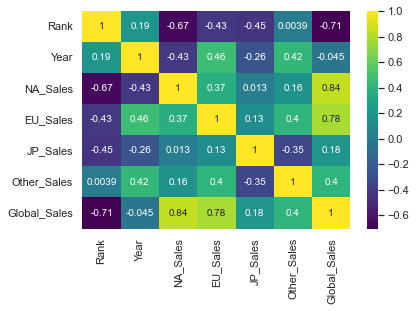

In [6]:
# Q4: What similarites are there between the top selling games?
# For this question, I will use the top twenty games of the dataset and make a correlation heatmap as well as 
# categorical bar plots.
seaborn.set(rc={'figure.figsize':(20,20)})
seaborn.heatmap(game_sales_data.head(20).corr(), annot = True, cmap = 'viridis');

In [7]:
# Here we can see that most of the top-selling games were released around the same time.
game_sales_data.head(20)
# Roughly from 2006 to 20010
# Many of the top selling games were made by Nintendo, a company which aims for games that can be enjoyed by a 
# wide audience. Many of those games are made for the Wii console system or are under the Mario Bros. franchise. 
# We can also see that consumers in North America are the main contributing factor to the sales.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


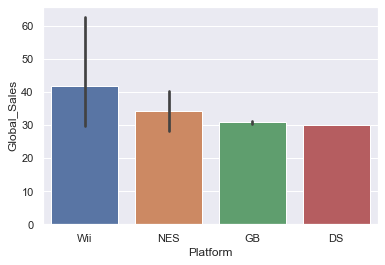

In [8]:
seaborn.barplot(x = game_sales_data['Platform'].head(10), y = game_sales_data["Global_Sales"]);
# We can confirm that most sales were for games released on the Wii.

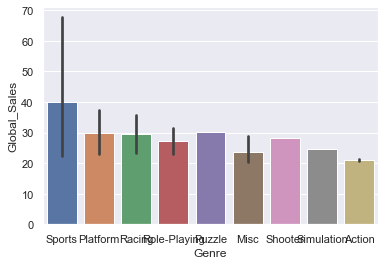

In [9]:
seaborn.barplot(x = game_sales_data['Genre'].head(20), y = game_sales_data["Global_Sales"]);
# Here we can see that Sports games were more popular than the other genres.

In [10]:
# Q5: Which country has the most consumers?
# In Q4, we saw the correlation of the top ten selling games where North America had the highest number of sales,
# but in order to check we need to see the entire list of games.
na = game_sales_data["NA_Sales"].sum()
eu = game_sales_data["EU_Sales"].sum()
jp = game_sales_data["JP_Sales"].sum()
ot = game_sales_data["Other_Sales"].sum()
print("NA :",na)
print("EU :",eu)
print("JP :",jp)
print("Other :",ot)
# We can see that North America has indeed purchased more games than the other places.

NA : 4392.950000000001
EU : 2434.1299999999997
JP : 1291.0200000000002
Other : 797.7500000000001


In [11]:
# Q6: Which platform is the most popular?
# For this question, we will find the number of sales of a game on a particular platform, thus sales will still be counted 
# if a game was released for multiple platforms.
dict_plat = {}
sorted_plat = {}
list_of_plat = game_sales_data["Platform"].unique()
for plat in list_of_plat:
    dict_plat[plat] = game_sales_data["Global_Sales"][game_sales_data["Platform"] == plat].sum()
keys = sorted(dict_plat, key=dict_plat.get, reverse=True)
for k in keys:
    sorted_plat[k] = dict_plat[k]
for plat in sorted_plat:
    print(plat,":",sorted_plat[plat])

PS2 : 1255.6399999999999
X360 : 979.96
PS3 : 957.84
Wii : 926.71
DS : 822.49
PS : 730.66
GBA : 318.5
PSP : 296.28000000000003
PS4 : 278.1
PC : 258.82
XB : 258.26
GB : 255.45000000000002
NES : 251.07
3DS : 247.46
N64 : 218.88
SNES : 200.05
GC : 199.35999999999999
XOne : 141.06
2600 : 97.07999999999998
WiiU : 81.86000000000001
PSV : 61.930000000000014
SAT : 33.59
GEN : 28.36
DC : 15.969999999999999
SCD : 1.8700000000000003
NG : 1.4400000000000002
WS : 1.42
TG16 : 0.16
3DO : 0.1
GG : 0.04
PCFX : 0.03


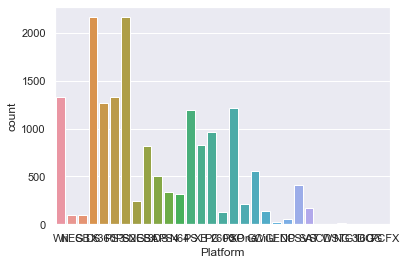

In [12]:
# The Playstation 2 turns out to be the most popular despite all of the top selling Nintendo games. Let's see why.
seaborn.countplot(x = game_sales_data["Platform"]);

DS : 0.3802542764678687
PS2 : 0.5810458121240166


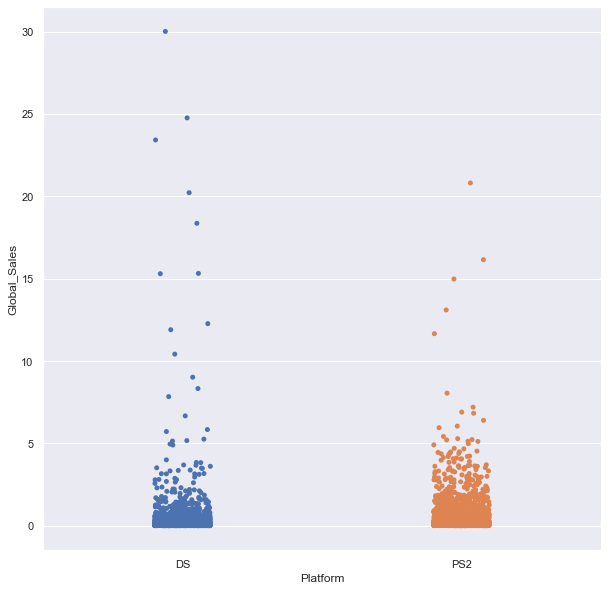

In [13]:
# The DS has a similar catalog size as the PS2, but not as many sales.
seaborn.set(rc={'figure.figsize':(10,10)})
filtered_data = game_sales_data[(game_sales_data['Platform'] == "DS") | (game_sales_data["Platform"] == "PS2")]
print("DS :", filtered_data[filtered_data["Platform"] == "DS"]["Global_Sales"].mean())
print("PS2 :", filtered_data[filtered_data["Platform"] == "PS2"]["Global_Sales"].mean())
seaborn.stripplot(y = filtered_data["Global_Sales"], x = filtered_data["Platform"]);
# The PS2 has slightly higher average global sales than the DS.

In [14]:
# Q7: What series is most popular?
# In order to group together the series, we will look for key words in the game title. To get those keywords, I will
# look for instances where the same words appear often.


In [15]:
# Q8: Which genres are more popular?
# For the purpose of this question, popularity will be defined as the total sales of a genre globally.
dict_log = {}
sorted_log = {}
list_of_genres = game_sales_data["Genre"].unique()
for genre in list_of_genres:
    dict_log[genre] = game_sales_data["Global_Sales"][game_sales_data["Genre"] == genre].sum()
keys = sorted(dict_log, key=dict_log.get, reverse=True)
for k in keys:
    sorted_log[k] = dict_log[k]
for genre in sorted_log:
    print(genre,":",sorted_log[genre])

Action : 1751.18
Sports : 1330.93
Shooter : 1037.3700000000001
Role-Playing : 927.37
Platform : 831.37
Misc : 809.9600000000002
Racing : 732.04
Fighting : 448.91
Simulation : 392.2000000000001
Puzzle : 244.95
Adventure : 239.03999999999996
Strategy : 175.12000000000003


In [34]:
# Q9: How did sequels of popular games do in terms of sales?
# For this question, I will use a few of the most popular series to determine how sequels perform.
franchise = ["Super Mario", "Call of Duty", "Halo", "Animal Crossing", "Mario Kart", "Pokemon"]
titles = []
l = []
for name in game_sales_data["Name"]:
    for title in franchise:
        if title in name:
            if name in titles:
                break
            else:
                titles.append(name)
titles.sort()
for t in titles:
    print(game_sales_data[game_sales_data["Name"] == t].filter(items=["Name","Global_Sales"]))


                Name  Global_Sales
435  Animal Crossing          3.15
                                  Name  Global_Sales
4657  Animal Crossing: Amiibo Festival          0.42
                           Name  Global_Sales
226  Animal Crossing: City Folk          4.68
                                     Name  Global_Sales
476  Animal Crossing: Happy Home Designer          2.98
                         Name  Global_Sales
73  Animal Crossing: New Leaf          9.09
                           Name  Global_Sales
41  Animal Crossing: Wild World         12.27
                                 Name  Global_Sales
6098  Battle & Get! Pokemon Typing DS          0.29
                 Name  Global_Sales
841    Call of Duty 2          2.02
12408  Call of Duty 2          0.06
                Name  Global_Sales
550   Call of Duty 3          2.71
711   Call of Duty 3          2.26
1238  Call of Duty 3          1.52
1919  Call of Duty 3          1.07
                                Name  Global_Sales
70

In [35]:
count = 0
for t in titles:
    print(game_sales_data[game_sales_data["Name"] == t].filter(items=["Name","Global_Sales"]))
    count += 1
    if count == 6:
        break
# The Animal Crossing franchise goes as follows: Animal Crossing, Wild World, City Folk, New Leaf,
# Happy Home Designer, and Amiibo Festival. Using the global sales value, we can see that Wild World
# sold very well compared to the original Animal Crossing, but then City Folk dropped in sales, with
# New Leaf also selling very well. Happy Home Designer and Amiibo Festival are spin-off games, but 
# Amiibo Festival sold very poorly compared to Happy Home Designer.

                Name  Global_Sales
435  Animal Crossing          3.15
                                  Name  Global_Sales
4657  Animal Crossing: Amiibo Festival          0.42
                           Name  Global_Sales
226  Animal Crossing: City Folk          4.68
                                     Name  Global_Sales
476  Animal Crossing: Happy Home Designer          2.98
                         Name  Global_Sales
73  Animal Crossing: New Leaf          9.09
                           Name  Global_Sales
41  Animal Crossing: Wild World         12.27


In [38]:
count = 0
for t in titles:
    count += 1
    if count >= 8:
        print(game_sales_data[game_sales_data["Name"] == t].filter(items=["Name","Global_Sales"]))
    if count == (8+19):
        break

                 Name  Global_Sales
841    Call of Duty 2          2.02
12408  Call of Duty 2          0.06
                Name  Global_Sales
550   Call of Duty 3          2.71
711   Call of Duty 3          2.26
1238  Call of Duty 3          1.52
1919  Call of Duty 3          1.07
                                Name  Global_Sales
70    Call of Duty 4: Modern Warfare          9.32
120   Call of Duty 4: Modern Warfare          6.72
1769  Call of Duty 4: Modern Warfare          1.15
1944  Call of Duty 4: Modern Warfare          1.06
                                      Name  Global_Sales
1071  Call of Duty Black Ops: Declassified          1.69
                                Name  Global_Sales
93    Call of Duty: Advanced Warfare          7.60
193   Call of Duty: Advanced Warfare          5.13
244   Call of Duty: Advanced Warfare          4.45
257   Call of Duty: Advanced Warfare          4.31
4740  Call of Duty: Advanced Warfare          0.41
                         Name  Global_Sale

We can see by order of release as shown here: https://en.wikipedia.org/wiki/Call_of_Duty#Main_series that the sequels tended to do better except for Black Ops: Declassified,
which was a Playstation Vita game, which failed due to flaws in the game's engine.

In [42]:
# Q10: How many indie games are top sellers compared to AAA games?
# We will use the top 50 games sold for this question.
pandas.options.display.max_rows = 50
game_sales_data.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


We can already see that the top sellers are dominated by big names. So the answer is that Indie Games can't compete with triple A titles. However, when is the first instance of an Indie game? 

In [43]:
# The first instance is actually Minecraft, in 73th place.
game_sales_data[game_sales_data["Name"] == "Minecraft"]
# While it is listed as under Microsoft publication, I will count it as an Indie title because it 
# started as one and was later picked up.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
72,73,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
168,169,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
297,298,Minecraft,PS4,2014.0,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
643,644,Minecraft,XOne,2014.0,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
713,715,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25
4513,4515,Minecraft,WiiU,2016.0,Misc,Microsoft Game Studios,0.18,0.09,0.14,0.03,0.43
